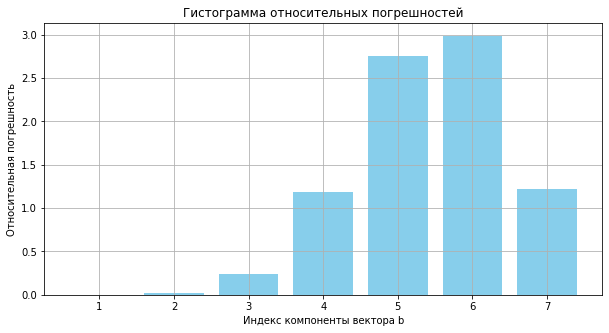

Индекс компоненты с максимальной погрешностью: 6
Это показывает, какая компонента вектора b наиболее влияет на погрешность решения системы уравнений.
Относительные погрешности для каждой компоненты: [5.16849070e-04 2.08398507e-02 2.42893291e-01 1.18745150e+00
 2.75035367e+00 2.98473187e+00 1.21925941e+00]
Каждое значение в этом списке отражает изменение решения при модификации соответствующей компоненты вектора b на малую величину.
Относительная погрешность решения, связанная с изменением компоненты b_6: 2.984731866731939
Это значение демонстрирует, насколько изменится решение, если изменить m-ую компоненту вектора b.
Относительное изменение компоненты b_6 из-за добавленной погрешности: 0.02
Показывает процентное изменение m-ой компоненты вектора b.
Число обусловленности матрицы A: 349605745.1544441
Число обусловленности характеризует, насколько велика может быть погрешность решения при малых изменениях в данных.
Теоретическая относительная погрешность решения для компоненты b_6, рассч

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания матрицы системы A
def create_matrix(N, n):
    C = np.fromfunction(lambda i, j: 0.1 * N * (i + 1) * (j + 1), (n, n), dtype=int)
    A = 135 / (2 + 0.3 * C) ** 5
    return A

# Функция для вычисления относительных погрешностей
def calculate_deltas(A, b, delta):
    x = np.linalg.solve(A, b)
    cond_value = np.linalg.cond(A, p=np.inf)
    d = np.empty(n)
    for i in range(n):
        b_modified = b.copy()
        b_modified[i] += delta
        x_modified = np.linalg.solve(A, b_modified)
        d[i] = np.linalg.norm(x - x_modified, ord=np.inf) / np.linalg.norm(x, ord=np.inf)
    return d, cond_value

# Используем параметры вашего варианта
N, n = 5, 7
delta = 0.1

# Создание матрицы A и вектора правой части b
A = create_matrix(N, n)
b = np.full(n, N, dtype=float)

# Решение системы и вычисление погрешностей
d, cond_value = calculate_deltas(A, b, delta)

# Построим гистограмму относительных погрешностей
plt.figure(figsize=(10, 5))
plt.bar(range(1, n+1), d, color='skyblue')
plt.xlabel('Индекс компоненты вектора b')
plt.ylabel('Относительная погрешность')
plt.title('Гистограмма относительных погрешностей')
plt.xticks(range(1, n+1))
plt.grid(True)
plt.show()

# Индекс и значение максимальной погрешности
m = np.argmax(d) + 1
delta_xm = d[m - 1]
delta_bm = delta / b[0]  # Все элементы b одинаковы

# Рассчитываем теоретическую погрешность
theoretical_delta = cond_value * delta_bm

# Проверяем, удовлетворяет ли практическая погрешность теоретической
cmp_sign = '<=' if delta_xm <= theoretical_delta else '>'

# Вывод с пояснениями
print(f"Индекс компоненты с максимальной погрешностью: {m}")
print("Это показывает, какая компонента вектора b наиболее влияет на погрешность решения системы уравнений.")
print(f"Относительные погрешности для каждой компоненты: {d}")
print("Каждое значение в этом списке отражает изменение решения при модификации соответствующей компоненты вектора b на малую величину.")
print(f"Относительная погрешность решения, связанная с изменением компоненты b_{m}: {delta_xm}")
print("Это значение демонстрирует, насколько изменится решение, если изменить m-ую компоненту вектора b.")
print(f"Относительное изменение компоненты b_{m} из-за добавленной погрешности: {delta_bm}")
print("Показывает процентное изменение m-ой компоненты вектора b.")
print(f"Число обусловленности матрицы A: {cond_value}")
print("Число обусловленности характеризует, насколько велика может быть погрешность решения при малых изменениях в данных.")
print(f"Теоретическая относительная погрешность решения для компоненты b_{m}, рассчитанная на основе числа обусловленности и относительного изменения в b_{m}: {theoretical_delta}")
print("Это теоретическая оценка максимальной возможной погрешности решения, связанная с изменением компоненты b_{m}.")
print(f"Практическая относительная погрешность решения для b_{m} {cmp_sign} теоретическая относительная погрешность решения")
print("Сравнение показывает, удовлетворяет ли наблюдаемая погрешность теоретической оценке.")

